In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('OECD.spese_per_funzione_2014_2022.csv', skiprows=6)

# Remove rows that contain metadata or placeholders
data_cleaned = data.drop([0])

del data_cleaned['Time period.1']

# Display the first few rows of the dataframe
data_cleaned.head(20)


,Time period,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,Reference area: Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Combined unit of measure: National currency, C...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Total,"124.706,60","114.993,50","118.053,70","118.937,40","122.228,60","126.815,40","142.190,70","146.248,80","P 151.738,50"
4,· Defence,"3.530,00","3.450,00","3.457,50","3.520,70","3.481,20","3.769,50","4.138,80","4.452,80","P 5.439,40"
5,· · Military defence,"3.437,90","3.338,20","3.261,80","3.317,70","3.334,30","3.628,50","4.007,40","4.296,70","P 5.175,10"
6,· · Civil defence,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","P 0,00"
7,· · Foreign military aid,"69,40","91,30","170,50","179,80","119,30","113,30","102,30","126,80","P 231,60"
8,· · R&D Defence,"22,10","20,00","25,10","23,00","27,40","27,50","29,00","29,10","P 32,50"
9,· · Defence n.e.c.,"0,60","0,50","0,20","0,20","0,20","0,20","0,20","0,20","P 0,20"
10,· Health,"3.403,60","3.430,50","3.326,10","512,70","541,20","703,80","1.922,40","1.955,10","P 1.691,20"


In [6]:
data_cleaned.to_csv('data_cleaned.csv')

In [7]:
# Identify rows that contain the start of a new country dataset
reference_area_rows = data_cleaned[data_cleaned['Time period'].str.contains('Reference area:')].index
combined_unit_rows = data_cleaned[data_cleaned['Time period'].str.contains('Combined unit of measure:')].index

# Initialize a dictionary to hold dataframes for each country
country_dataframes = {}

# Iterate through the identified rows and extract the country data
for ref_row, unit_row in zip(reference_area_rows, combined_unit_rows):
    country_name = data_cleaned.loc[ref_row, 'Time period'].split(': ')[1]
    next_ref_row = reference_area_rows[reference_area_rows > ref_row].min()
    
    # If this is the last country, use the end of the dataframe as the end index
    if pd.isna(next_ref_row):
        country_df = data_cleaned.loc[unit_row+1:]
    else:
        country_df = data_cleaned.loc[unit_row+1:next_ref_row-1]
    
    country_dataframes[country_name] = country_df

In [8]:
country_dataframes.keys()

dict_keys(['Belgium', 'Colombia', 'France', 'Germany', 'Greece', 'Hungary', 'Italy', 'Japan', 'Korea', 'Netherlands', 'Poland', 'Portugal', 'Spain', 'Sweden', 'United Kingdom', 'United States'])

In [9]:
country_dataframes['Korea']

,Time period,2014,2015,2016,2017,2018,2019,2020,2021,2022
81,Total,"E 292.165.300,00","E 305.950.800,00","E 314.795.100,00","E 328.665.000,00","E 351.219.500,00","E 394.641.500,00","E 433.032.300,00","E 473.787.200,00",NaN
82,· Defence,"38.225.200,00","40.233.800,00","41.129.900,00","41.447.300,00","46.388.000,00","49.406.400,00","51.862.900,00","55.386.400,00",NaN
83,· Health,"7.668.800,00","8.592.000,00","10.051.600,00","9.831.000,00","10.743.400,00","12.845.200,00","17.021.400,00","22.161.300,00",NaN
84,· Education,"53.761.700,00","56.138.100,00","59.074.900,00","66.374.700,00","72.358.300,00","80.908.900,00","78.257.900,00","85.393.500,00",NaN


In [10]:
# Function to remove the 'P' prefix from cells
def remove_provisional_prefixes(df):
    return df.map(lambda x: x[3:] if isinstance(x, str) and ( x.startswith('P ') or x.startswith('E ') ) else x)

# Apply the function to all country dataframes
cleaned_country_dataframes = {country: remove_provisional_prefixes(df) for country, df in country_dataframes.items()}

In [11]:
cleaned_country_dataframes['Korea']

,Time period,2014,2015,2016,2017,2018,2019,2020,2021,2022
81,Total,"292.165.300,00","305.950.800,00","314.795.100,00","328.665.000,00","351.219.500,00","394.641.500,00","433.032.300,00","473.787.200,00",NaN
82,· Defence,"38.225.200,00","40.233.800,00","41.129.900,00","41.447.300,00","46.388.000,00","49.406.400,00","51.862.900,00","55.386.400,00",NaN
83,· Health,"7.668.800,00","8.592.000,00","10.051.600,00","9.831.000,00","10.743.400,00","12.845.200,00","17.021.400,00","22.161.300,00",NaN
84,· Education,"53.761.700,00","56.138.100,00","59.074.900,00","66.374.700,00","72.358.300,00","80.908.900,00","78.257.900,00","85.393.500,00",NaN


In [12]:
import numpy as np

# Adjusted function to clean numeric strings and convert them to float, handling non-string values
def clean_and_convert_to_float(value):
    if isinstance(value, str):
        try:
            return float(value.replace('.', '').replace(',', '.'))
        except ValueError:
            return np.nan
    return value

# Function to compute values as a percentage of the total
def compute_percentage_of_total(df):
    total_row = df[df['Time period'].str.strip() == 'Total']
    if not total_row.empty:
        total_values = total_row.iloc[0, 1:].apply(clean_and_convert_to_float)
        percentage_df = df.iloc[1:].copy()
        for col in percentage_df.columns[1:]:
            percentage_df[col] = percentage_df[col].apply(clean_and_convert_to_float) * 100 / total_values[col]
            percentage_df[col] = percentage_df[col].round(2)
        return percentage_df
    return df

# Apply the function to all country dataframes
percentage_country_dataframes = {country: compute_percentage_of_total(df) for country, df in cleaned_country_dataframes.items()}

# Display the percentage data for the sample country (Belgium) as a check
sample_country = 'Korea'
percentage_sample_country_data = percentage_country_dataframes[sample_country]
percentage_sample_country_data

,Time period,2014,2015,2016,2017,2018,2019,2020,2021,2022
82,· Defence,13.08,13.15,13.07,12.61,13.21,12.52,11.98,11.69,NaN
83,· Health,2.62,2.81,3.19,2.99,3.06,3.25,3.93,4.68,NaN
84,· Education,18.40,18.35,18.77,20.20,20.60,20.50,18.07,18.02,NaN


## Grafici

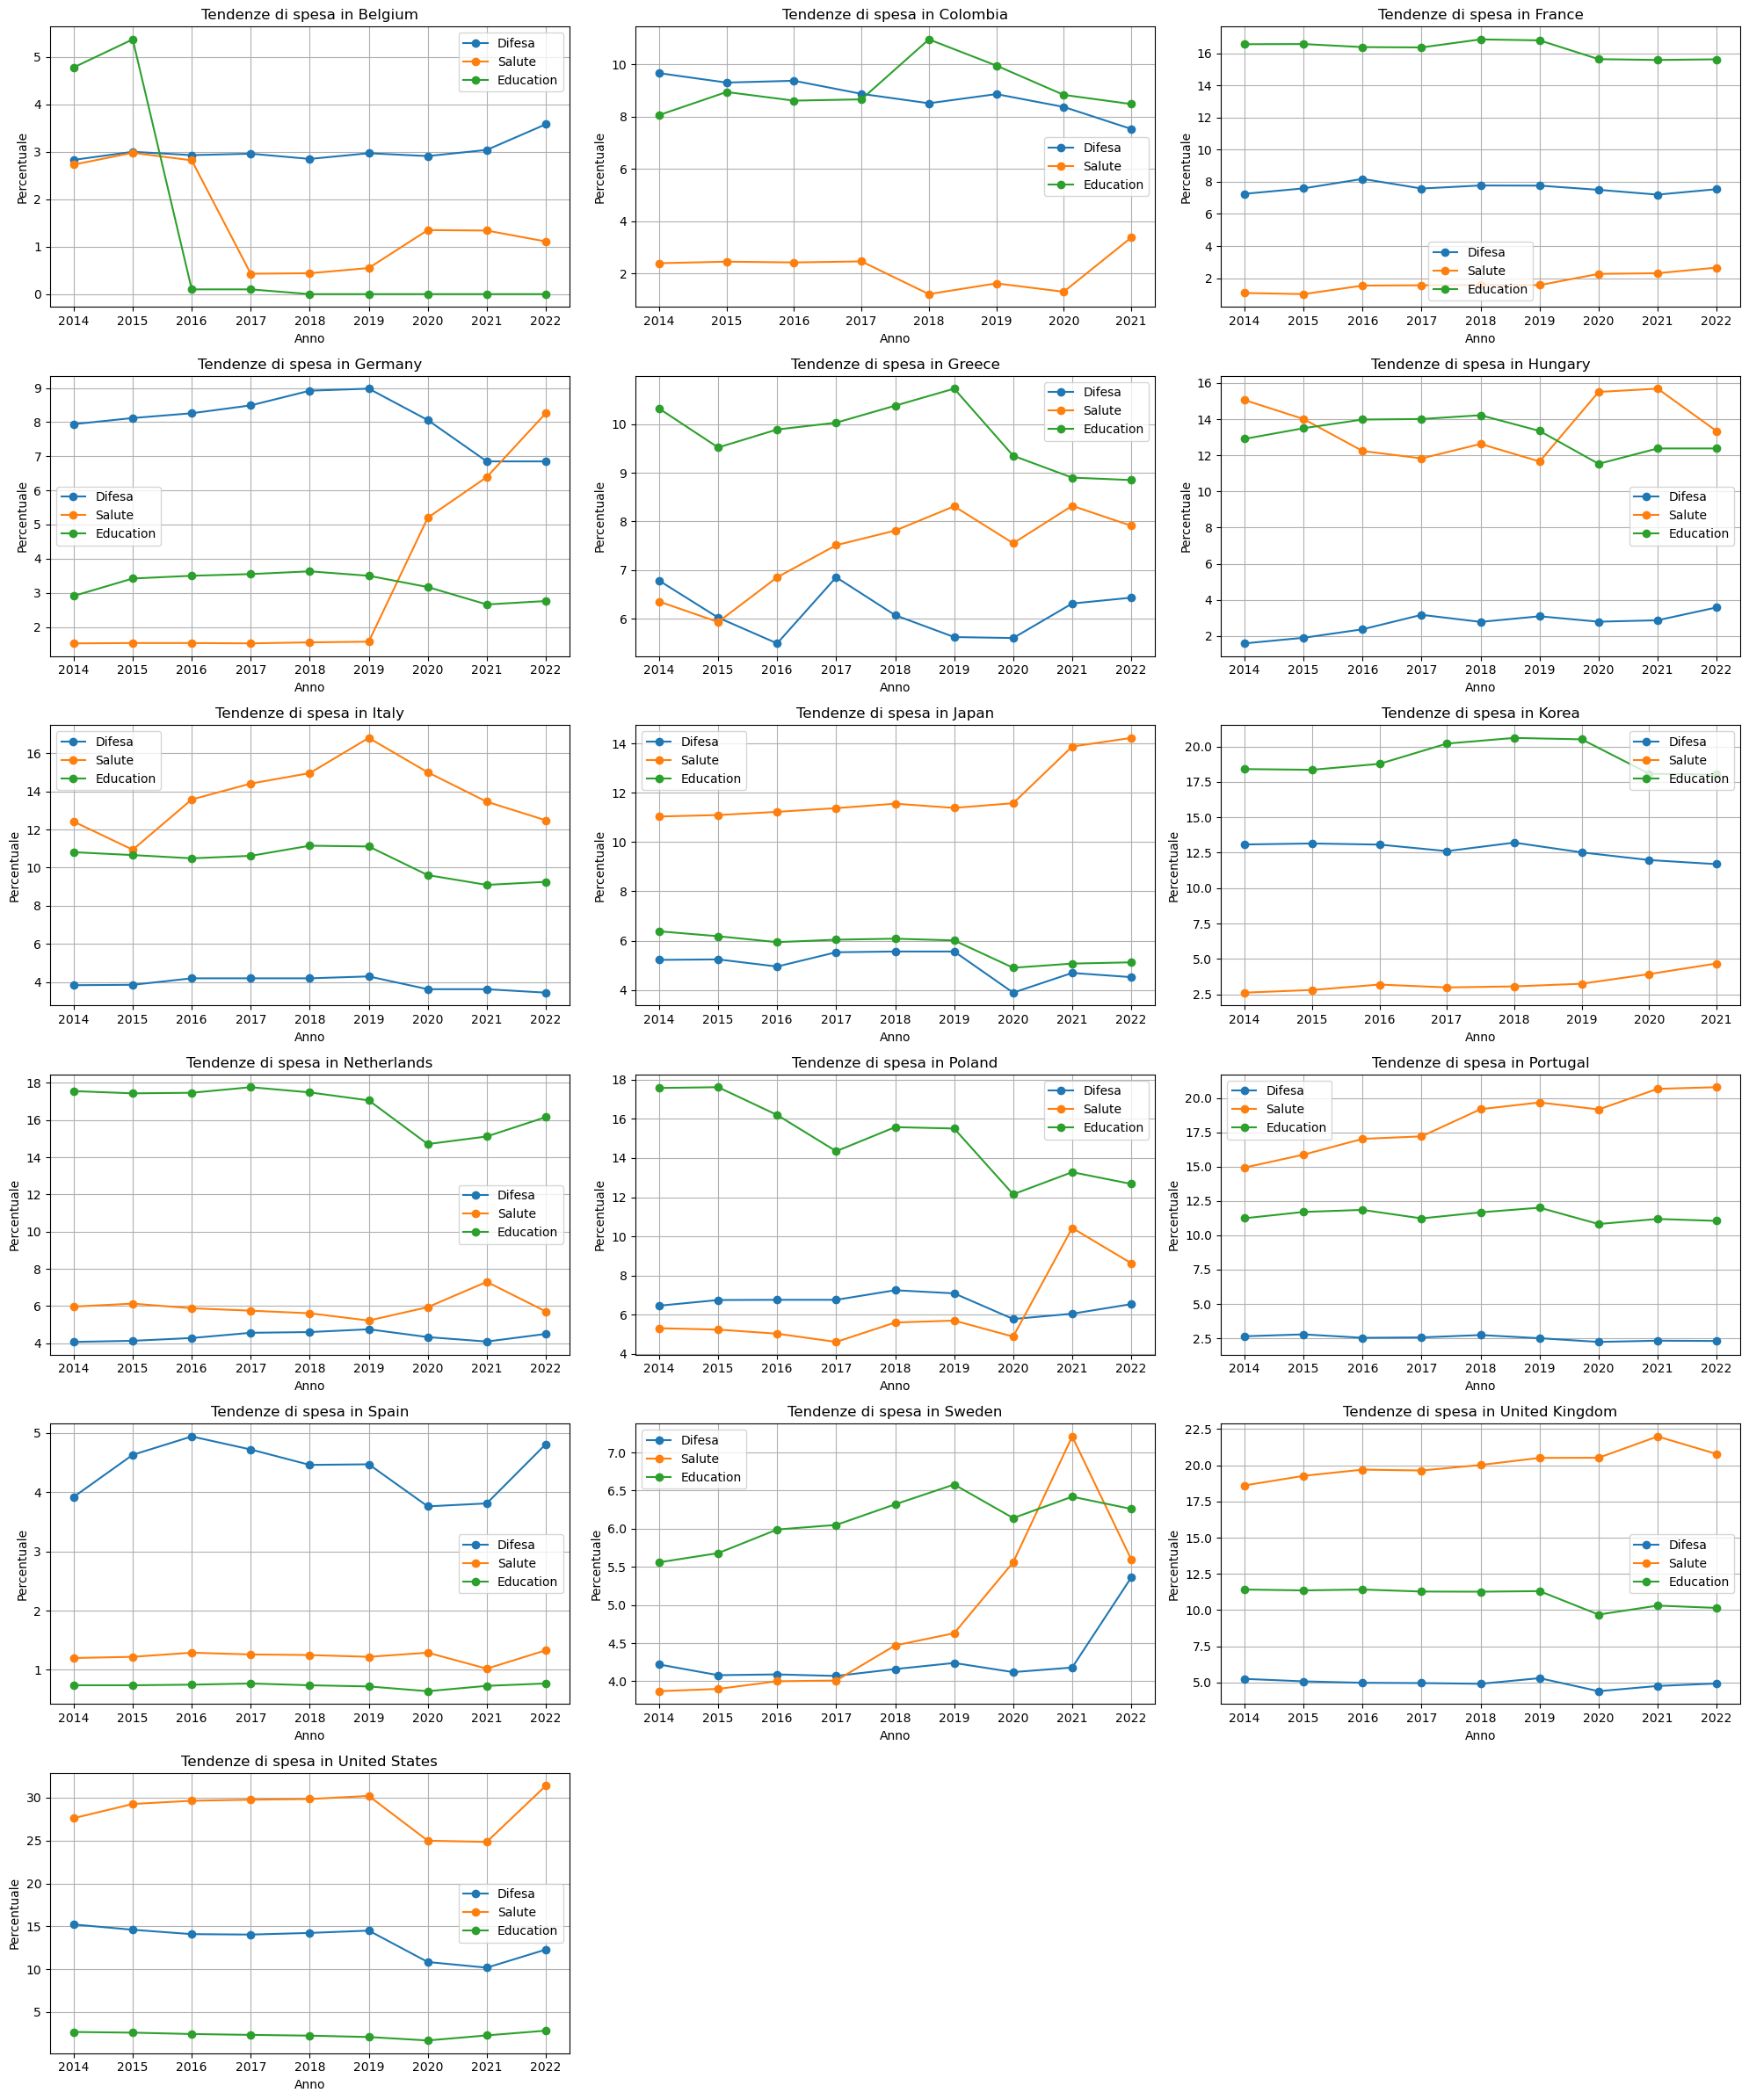

In [13]:
import matplotlib.pyplot as plt

# List of countries for which we need to plot the data
countries = list(percentage_country_dataframes.keys())

# Number of plots per row
plots_per_row = 3
num_countries = len(countries)
num_rows = (num_countries + plots_per_row - 1) // plots_per_row

# Prepare the figure
plt.figure(figsize=(20, 4 * num_rows))

for i, country in enumerate(countries):
    country_data = percentage_country_dataframes[country]
    country_expenditures = country_data[country_data['Time period'].str.strip().isin(['·  Defence', '·  Health', '·  Education'])]
    
    if country_expenditures.empty:
        continue
    
    # Transform the dataframe to have 'Time period' as index and years as columns
    country_expenditures = country_expenditures.set_index('Time period').T.reset_index().rename(columns={'index': 'Year'})
    
    # Create subplot
    plt.subplot(num_rows, plots_per_row, i + 1)
    plt.plot(country_expenditures['Year'], country_expenditures['·  Defence'], marker='o', label='Difesa')
    plt.plot(country_expenditures['Year'], country_expenditures['·  Health'], marker='o', label='Salute')
    plt.plot(country_expenditures['Year'], country_expenditures['·  Education'], marker='o', label='Education')
    plt.title(f'Tendenze di spesa in {country}')
    plt.xlabel('Anno')
    plt.ylabel('Percentuale')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


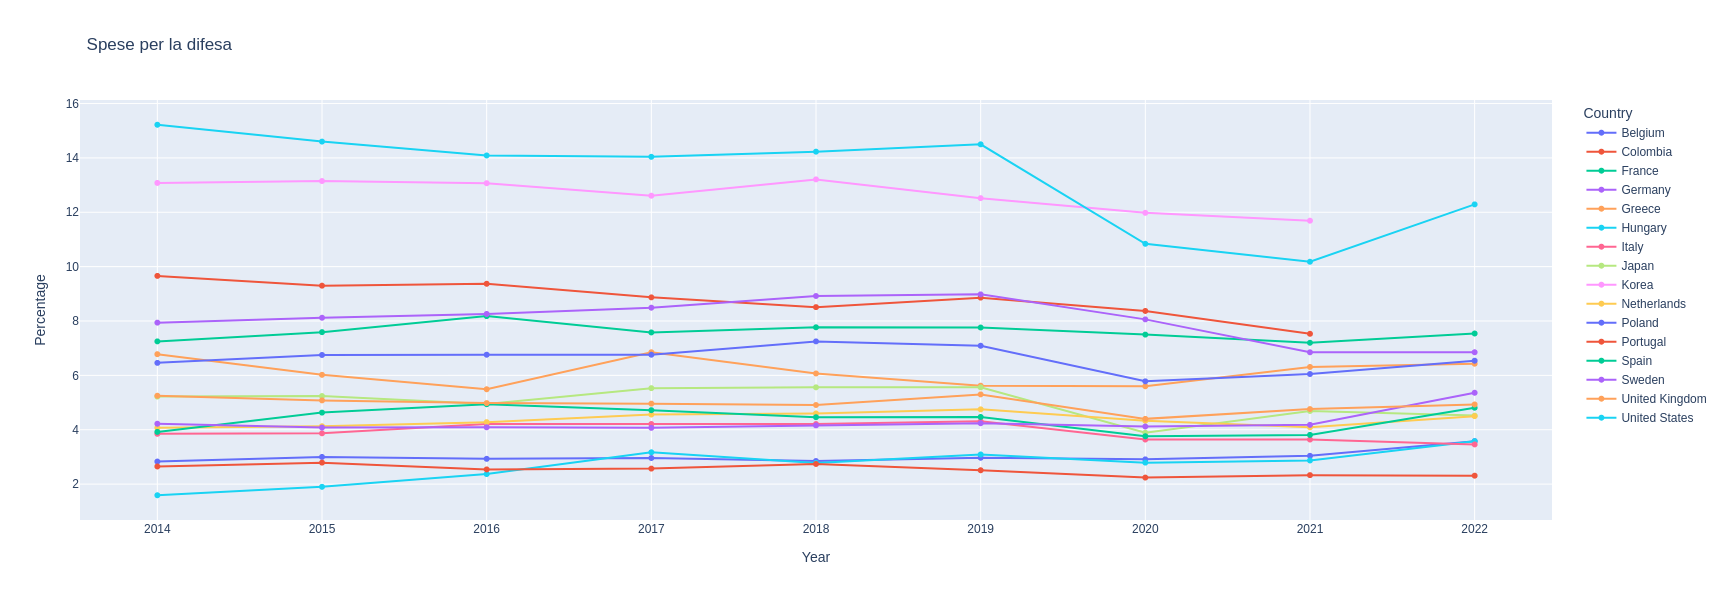

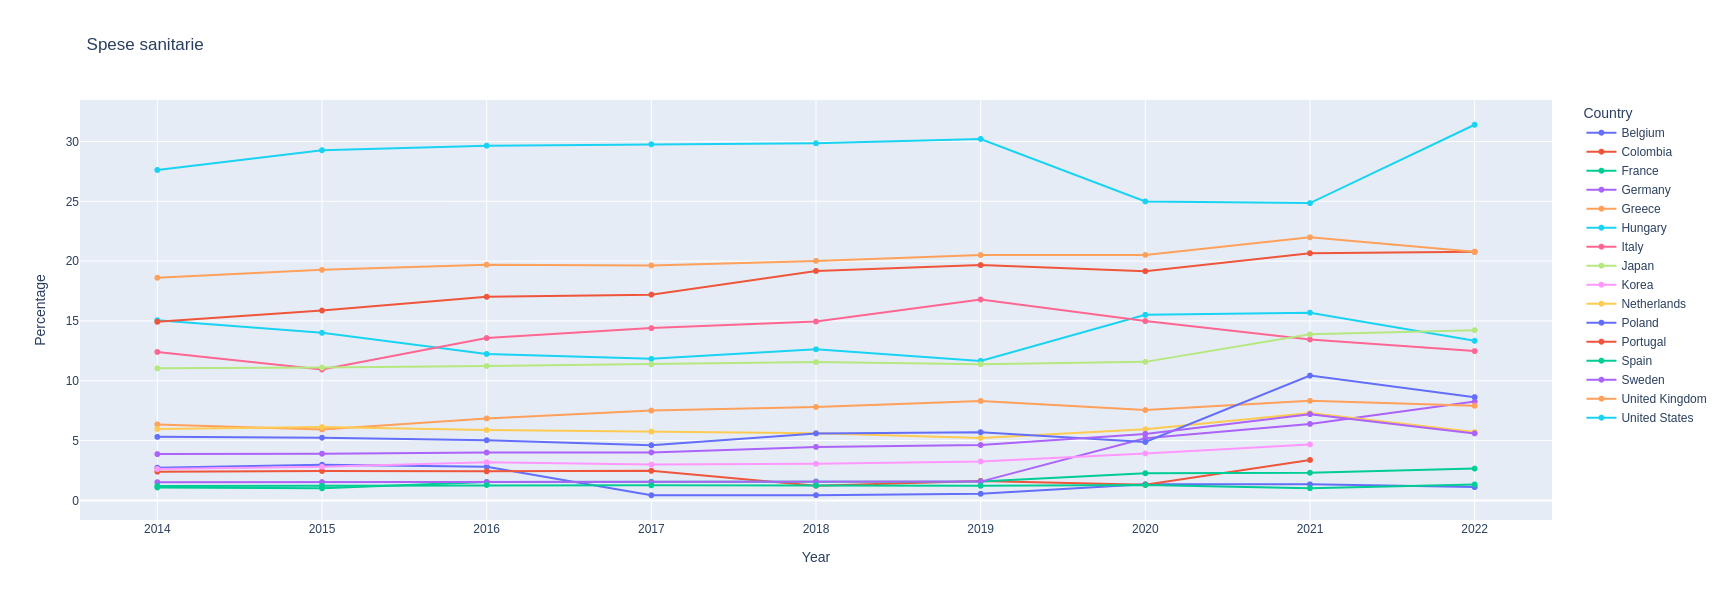

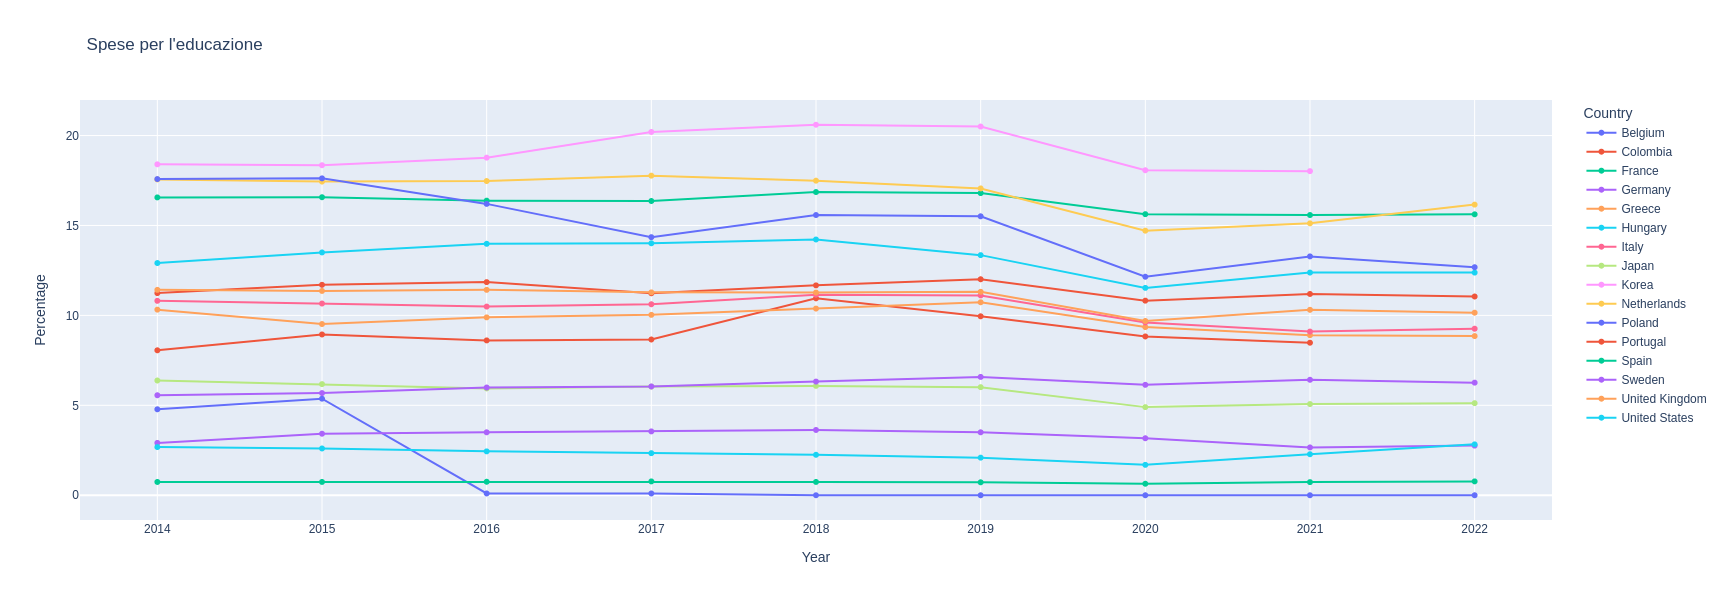

In [16]:
import plotly.graph_objects as go
import pandas as pd

# Prepare data for all countries
def extract_expenditure_data(expenditure):
    expenditure_data = {}
    for country, df in percentage_country_dataframes.items():
        exp_data = df[df['Time period'].str.strip() == expenditure]
        if not exp_data.empty:
            expenditure_data[country] = exp_data.iloc[0, 1:].tolist()
    return pd.DataFrame(expenditure_data)

defence_data = extract_expenditure_data('·  Defence')
health_data = extract_expenditure_data('·  Health')
education_data = extract_expenditure_data('·  Education')

years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
defence_data['Year'] = years
health_data['Year'] = years
education_data['Year'] = years

defence_data = defence_data[['Year'] + [col for col in defence_data.columns if col != 'Year']]
health_data = health_data[['Year'] + [col for col in health_data.columns if col != 'Year']]
education_data = education_data[['Year'] + [col for col in education_data.columns if col != 'Year']]

# Create interactive plots using Plotly

# 1. Defence Expenditures Trends Across All Countries
fig_defence = go.Figure()
for country in defence_data.columns[1:]:
    fig_defence.add_trace(go.Scatter(x=defence_data['Year'], y=defence_data[country],
                                     mode='lines+markers', name=country))

fig_defence.update_layout(title='Spese per la difesa',
                          xaxis_title='Year', yaxis_title='Percentage',
                          legend_title='Country', hovermode='closest',
                          height=600)

# 2. Health Expenditures Trends Across All Countries
fig_health = go.Figure()
for country in health_data.columns[1:]:
    fig_health.add_trace(go.Scatter(x=health_data['Year'], y=health_data[country],
                                    mode='lines+markers', name=country))

fig_health.update_layout(title='Spese sanitarie',
                         xaxis_title='Year', yaxis_title='Percentage',
                         legend_title='Country', hovermode='closest',
                         height=600)

# 3. Education Expenditures Trends Across All Countries
fig_education = go.Figure()
for country in education_data.columns[1:]:
    fig_education.add_trace(go.Scatter(x=education_data['Year'], y=education_data[country],
                                       mode='lines+markers', name=country))

fig_education.update_layout(title="Spese per l'educazione",
                            xaxis_title='Year', yaxis_title='Percentage',
                            legend_title='Country', hovermode='closest',
                            height=600)

# Show plots
fig_defence.show()
fig_health.show()
fig_education.show()
